<a href="https://colab.research.google.com/github/citurriagab/Data_Hist_Resultados/blob/main/CNN_GrapevineLeaves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Trabajo N° 2

#### Deep Learning 

**Análisis Supervisado**

**Clasificación**

*Carla Iturriaga Barrios*

*Rodrigo Lefin Carrasco*

Septiembre, 2022

#### Importe y Activación de librerías

In [38]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [39]:
import os
from os import walk
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

import torch
from torchvision import datasets, transforms

# define helper.py 
import matplotlib.pyplot as plt
import numpy as np
from torch import nn, optim
from torch.autograd import Variable

### 1. Datos: Imagenes de hojas de parra

**Carga del repositorio**

In [43]:
cd /content/gdrive/MyDrive/DataGrapevineLeaves

/content/gdrive/MyDrive/DataGrapevineLeaves


In [44]:
ls

TEST/  TRAIN/


In [46]:
print(os.listdir('/content/gdrive/MyDrive/DataGrapevineLeaves'))

['TEST', 'TRAIN']


In [58]:
PATH = '/content/gdrive/MyDrive/DataGrapevineLeaves'

In [60]:
data_dir = PATH + '/TRAIN'

**Transformación de la data**

In [64]:
transform = transforms.Compose([transforms.Resize(255),
                                transforms.CenterCrop(224),
                                transforms.ToTensor()
                               ])

In [65]:
dataset = datasets.ImageFolder(data_dir, transform=transform)

In [66]:
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)

In [67]:
data_dir

'/content/gdrive/MyDrive/DataGrapevineLeaves/TRAIN'

In [115]:
data_dir = PATH

In [73]:
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.5, 0.5, 0.5], 
                                                            [0.5, 0.5, 0.5])])

In [83]:
train_data = datasets.ImageFolder(data_dir + '/TRAIN', transform=train_transforms)
test_data = datasets.ImageFolder(data_dir + '/TEST', transform=test_transforms)

In [84]:
trainloader = torch.utils.data.DataLoader(train_data, batch_size=32)
testloader = torch.utils.data.DataLoader(test_data, batch_size=32)

**Previsualización de las imagenes de entrenamiento**

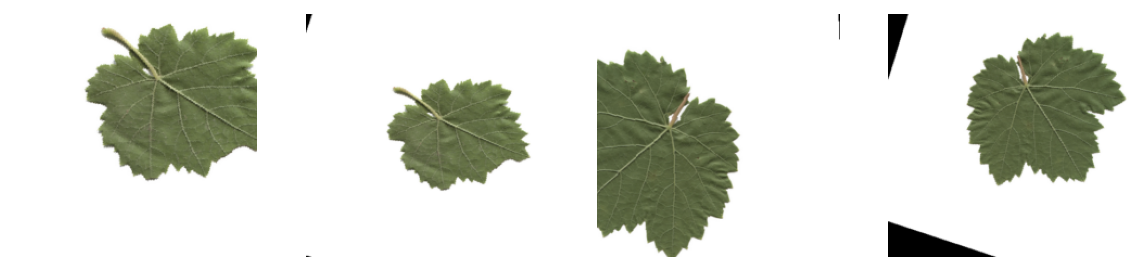

In [113]:
data_iter = iter(trainloader)

images, labels = next(data_iter)
fig, axes = plt.subplots(figsize=(10,4), ncols=4)
for ii in range(4):
    ax = axes[ii]
#     helper.imshow(images[ii], ax=ax, normalize=False)
    imshow(images[ii], ax=ax, normalize=False)

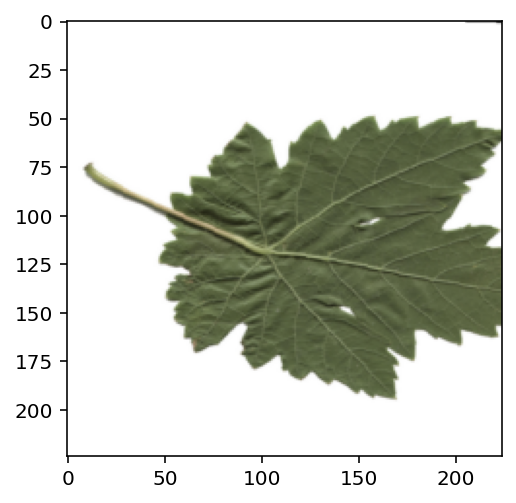

In [86]:
img_t, _ = train_data[30]
plt.imshow((img_t.permute(1, 2, 0)))
plt.show()

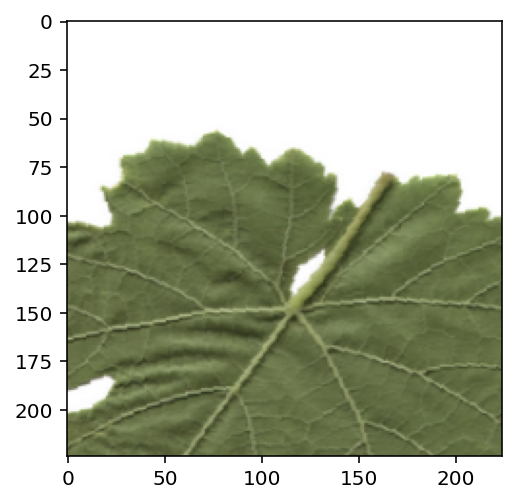

In [106]:
img_t, _ = train_data[87]
plt.imshow(img_t.permute(1, 2, 0))
plt.show()

### 2. Modelo: CNN

**Definición del Modelo**

In [90]:
# Model 
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1) # convolutional layer
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1) # convolutional layer
        self.fc1 = nn.Linear(8 * 8 * 8, 32)                     # Fully connected
        self.fc2 = nn.Linear(32, 2)                             # Fully connected
    def forward(self, x): # input img
        out = F.max_pool2d(torch.tanh(self.conv1(x)), 2)        # max pooling
        out = F.max_pool2d(torch.tanh(self.conv2(out)), 2)      # max pooling
        out = out.view(-1, 8 * 8 * 8)                           # tranform the out
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out  # dim: number of class

**Definición de la función de entrenamiento**

In [91]:
# Training function 
def training_loop(n_epochs, optimizer, model, loss_fn, train_loader):
    loss_list = []
    for epoch in range(1, n_epochs + 1):
        loss_train = 0.0 
        for imgs, labels in train_loader:  # batch 
            outputs = model(imgs)
            loss = loss_fn(outputs, labels)
            optimizer.zero_grad()
            loss.backward()               # backpro
            optimizer.step()              # update w
            
            loss_train += loss.item()
        if epoch == 1 or epoch % 10 == 0:
            print('Epoch {}, Training loss {}'.format(epoch,
            loss_train / len(train_loader)))
            loss_list.append(loss_train / len(train_loader))
    return loss_list

**Entrenamiento del Modelo CNN**

In [97]:
# Dataloader
train_loader = torch.utils.data.DataLoader(train_data, batch_size=62, shuffle=True)

In [111]:
# Run, traning
model = CNN()                                      # call our cnn class
optimizer = torch.optim.SGD(model.parameters(), lr=0.01) # Stochastic gradient descent
loss_fn = nn.CrossEntropyLoss()                    # Loss function

Loss1 = training_loop(
    n_epochs = 50,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)

NameError: ignored

**Gráfico del Error obtenido en Entrenamiento y Búsqueda del Valor óptimo**

In [99]:
# plot loss
plt.plot(Loss1)
plt.xlabel('Epoch(x10)')
plt.ylabel('Loss')

NameError: ignored

### 3. Métricas

In [102]:
# Testing metric
train_loader = torch.utils.data.DataLoader(train_data, batch_size=64,
                                            shuffle=False)
val_loader = torch.utils.data.DataLoader(test_data, batch_size=64,
                                            shuffle=False)
def validate(model, train_loader, val_loader):
    for name, loader in [("train", train_loader), ("val", val_loader)]:
        correct = 0
        total = 0
        with torch.no_grad():
            for imgs, labels in loader:
                outputs = model(imgs)
                _, predicted = torch.max(outputs, dim=1)
                total += labels.shape[0]
                # metrics: Acc, F1, AUC, Precision, Recall, 
                correct += int((predicted == labels).sum())
        print("Accuracy {}: {:.2f}".format(name , correct / total))

validate(model, train_loader, val_loader)

NameError: ignored